<a href="https://colab.research.google.com/github/maushamkumar/Pandas/blob/main/session_17_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

###`Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [1]:
import pandas as pd
import numpy as np

In [4]:
# code here
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}

birds = pd.DataFrame(data,index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k'])
birds.head()

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no


In [5]:
birds.shape

(11, 4)

In [6]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 740.0+ bytes


In [7]:
birds.describe()

,age,visits
count,9.000000,11.000000
mean,4.333333,2.818182
std,1.903943,0.873863
min,1.500000,2.000000
25%,3.500000,2.000000
50%,4.000000,3.000000
75%,5.500000,3.500000
max,8.000000,4.000000


In [8]:
birds.isnull().sum()

birds       0
age         2
visits      0
priority    1
dtype: int64

###`Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [12]:
# code here
birds.iloc[[1, 3, 7], [0, 1]]


,birds,age
b,Cranes,4.0
d,spoonbills,NaN
h,Cranes,NaN


In [18]:
birds[birds['visits'] < 4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


###`Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [19]:
# code here
birds[(birds['age'].isnull()) | (birds['visits'].isnull())]

,birds,age,visits,priority
d,spoonbills,NaN,4,NaN
h,Cranes,NaN,2,yes


In [20]:
# Fill nan with respective series mode value.
birds['age'].fillna(birds['age'].mode()[0], inplace=True)
birds['visits'].fillna(birds['visits'].mode()[0], inplace=True)

###`Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [21]:
# code here
birds[birds['birds'] == 'Cranes']['visits'].sum()


14

In [23]:
birds['birds'].value_counts()

birds
Cranes        5
spoonbills    4
plovers       2
Name: count, dtype: int64

In [24]:
birds.duplicated().sum()

2

In [25]:
birds.dropna(inplace=True)

##Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

###`Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [26]:
# code here
ipl = pd.read_csv('/content/ipl-matches.csv')

In [27]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [32]:
ipl['Team1'] = ipl['Team1'].replace({'Delhi Daredevils':'Delhi Capitals'})
ipl['Team2'] = ipl['Team2'].replace({'Delhi Daredevils':'Delhi Capitals'})

ipl['Team1'] = ipl['Team1'].replace({'Kings XI Punjab':'Punjab Kings'})
ipl['Team2'] = ipl['Team2'].replace({'Kings XI Punjab':'Punjab Kings'})

ipl['Team1'] = ipl['Team1'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'})
ipl['Team2'] = ipl['Team2'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'})

In [31]:
ipl['Team2']== 'Rising Pune Supergiants'

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [34]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


###`Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


In [35]:
# code here
ipl['Team1'].value_counts()

Team1
Royal Challengers Bangalore    126
Delhi Capitals                 114
Mumbai Indians                 112
Chennai Super Kings            111
Punjab Kings                   110
Kolkata Knight Riders          105
Rajasthan Royals                89
Sunrisers Hyderabad             69
Deccan Chargers                 39
Pune Warriors                   23
Gujarat Lions                   16
Rising Pune Supergiant          14
Lucknow Super Giants             8
Gujarat Titans                   7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [36]:
ipl['Team2'].value_counts()

Team2
Mumbai Indians                 119
Kolkata Knight Riders          118
Delhi Capitals                 110
Punjab Kings                   108
Rajasthan Royals               103
Royal Challengers Bangalore    100
Chennai Super Kings             97
Sunrisers Hyderabad             83
Deccan Chargers                 36
Pune Warriors                   23
Rising Pune Supergiant          16
Gujarat Lions                   14
Gujarat Titans                   9
Lucknow Super Giants             7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

<Axes: >

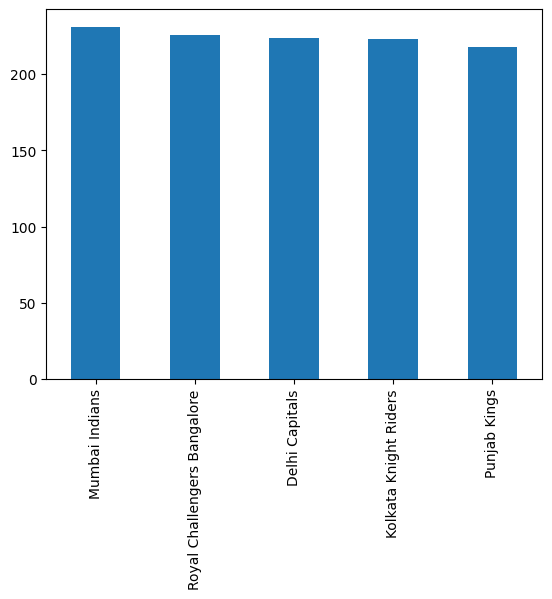

In [37]:
df = ipl['Team1'].value_counts() + ipl['Team2'].value_counts()
df.sort_values(ascending=False).head(5).plot(kind='bar')

In [40]:
df.sort_values()

Kochi Tuskers Kerala            14
Lucknow Super Giants            15
Gujarat Titans                  16
Gujarat Lions                   30
Rising Pune Supergiant          30
Pune Warriors                   46
Deccan Chargers                 75
Sunrisers Hyderabad            152
Rajasthan Royals               192
Chennai Super Kings            208
Punjab Kings                   218
Kolkata Knight Riders          223
Delhi Capitals                 224
Royal Challengers Bangalore    226
Mumbai Indians                 231
Name: count, dtype: int64

###`Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [42]:
# code here
ipl[ipl['WinningTeam'] == 'Mumbai Indians']['Player_of_Match'].value_counts()

Player_of_Match
RG Sharma          15
KA Pollard         14
SR Tendulkar        8
JJ Bumrah           7
AT Rayudu           7
SL Malinga          6
HH Pandya           6
Harbhajan Singh     6
SA Yadav            5
KH Pandya           4
DR Smith            4
Q de Kock           3
Ishan Kishan        3
LMP Simmons         3
TA Boult            3
MG Johnson          2
N Rana              2
MEK Hussey          2
CJ Anderson         2
JP Duminy           2
MJ McClenaghan      2
SM Pollock          2
ST Jayasuriya       2
MM Patel            2
YK Pathan           1
R McLaren           1
RE Levi             1
CRD Fernando        1
R Sharma            1
DJ Bravo            1
JEC Franklin        1
PA Patel            1
DW Steyn            1
KD Karthik          1
AP Tare             1
DR Sams             1
JC Buttler          1
KV Sharma           1
AS Joseph           1
RD Chahar           1
NM Coulter-Nile     1
TH David            1
A Nehra             1
Name: count, dtype: int64

### Let's check for rcb

In [43]:
ipl[ipl['WinningTeam'] == 'Royal Challengers Bangalore']['Player_of_Match'].value_counts()

Player_of_Match
AB de Villiers    23
CH Gayle          17
V Kohli           13
JH Kallis          5
YS Chahal          4
GJ Maxwell         3
R Vinay Kumar      3
HV Patel           3
KD Karthik         2
MV Boucher         2
LRPL Taylor        2
A Kumble           2
Yuvraj Singh       2
PA Patel           2
UT Yadav           2
KP Pietersen       2
PWH de Silva       2
MK Pandey          2
S Aravind          1
RM Patidar         1
RV Uthappa         1
R Dravid           1
JD Unadkat         1
KM Jadhav          1
MA Starc           1
VR Aaron           1
Mandeep Singh      1
SR Watson          1
TG Southee         1
SO Hetmyer         1
Mohammed Siraj     1
D Padikkal         1
KS Bharat          1
Anuj Rawat         1
F du Plessis       1
P Kumar            1
Name: count, dtype: int64

###`Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [65]:
# code here
def team1_vs_team2(t1, t2):
    m1 = (ipl.Team1 == t1) | (ipl.Team2 == t1)  # Filter for matches where only t1 played
    m2 = (ipl.Team1 == t2) | (ipl.Team2 == t2)  # Filter for matches where only t1 played
    df1 = ipl[m1 & m2]
    print(df1.WinningTeam.value_counts())
    print(df1.Player_of_Match.value_counts().head(1))

team1_vs_team2('Mumbai Indians','Chennai Super Kings')

WinningTeam
Mumbai Indians         20
Chennai Super Kings    14
Name: count, dtype: int64
Player_of_Match
KA Pollard         4
RG Sharma          3
SK Raina           3
ML Hayden          2
SR Tendulkar       2
HH Pandya          2
DR Smith           2
DR Sams            1
MM Sharma          1
Harbhajan Singh    1
Name: count, dtype: int64


TypeError: Cannot perform 'ror_' with a dtyped [object] array and scalar of type [bool]

In [44]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



<Axes: xlabel='City'>

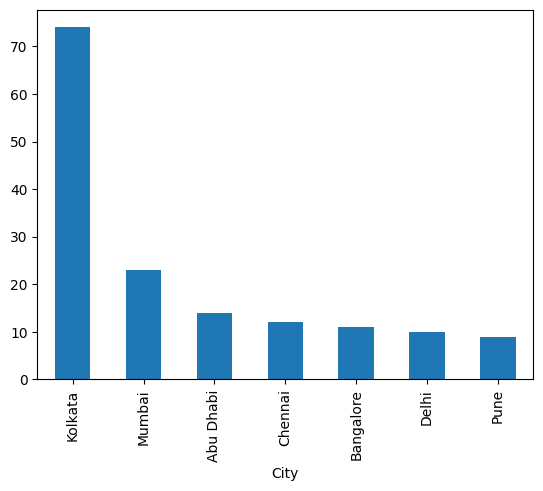

In [68]:
# code here
ipl[(ipl.Team1 == 'Kolkata Knight Riders')| (ipl.Team2 == 'Kolkata Knight Riders')]['City'].value_counts().head(7).plot(kind='bar')

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [69]:
# code here
ipl[ipl['Season'] == '2011']['Margin'].mean()

18.930555555555557